# Assignment 4

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import tensorflow as tf

## Question 1

In [2]:
reactor_data = pd.read_csv('reactor_data_v2.csv')
reactor_data

,Sample,Temp_C,Speed_100RPM,Yield_g,Baffles
0,0,84,45,53,False
1,1,88,39,37,True
2,2,85,44,42,True
3,3,79,34,47,True
4,4,76,40,55,False
5,5,72,40,49,True
6,6,82,37,42,True
7,7,87,45,57,False
8,8,60,45,60,False
9,9,77,40,59,False


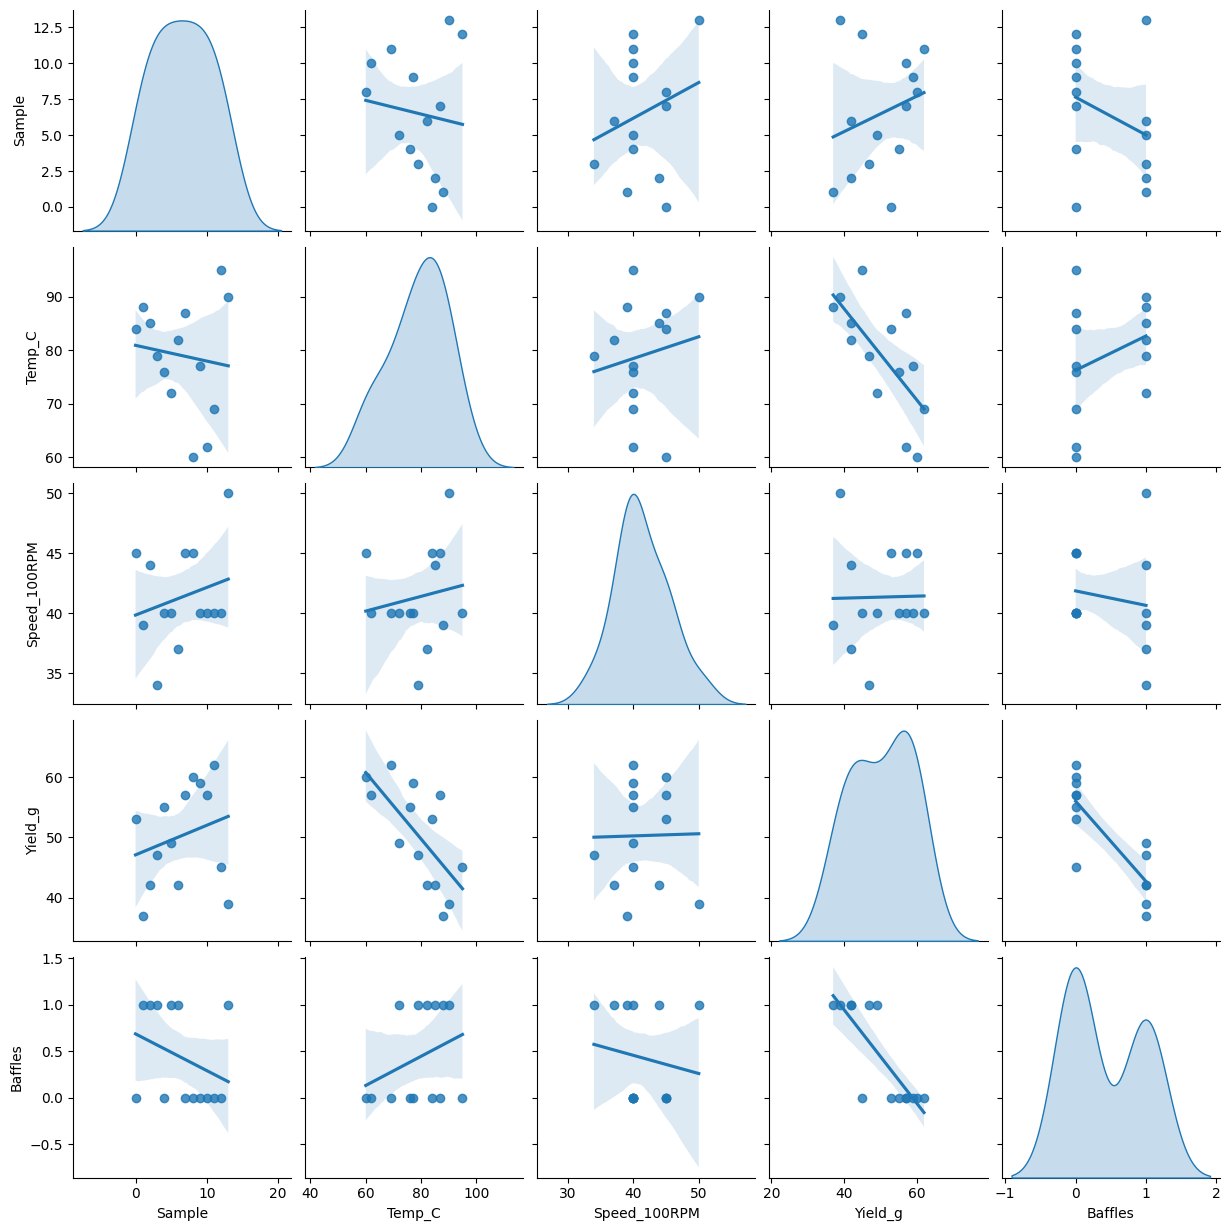

In [3]:
sns.pairplot(reactor_data, kind='reg', diag_kind='kde')
plt.show()

In [4]:
modelA = ols('Yield_g~Temp_C+Baffles', data=reactor_data)
modelA_fit = modelA.fit()
print(modelA_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                Yield_g   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     37.45
Date:                Sat, 16 Nov 2024   Prob (F-statistic):           1.23e-05
Time:                        21:28:20   Log-Likelihood:                -34.690
No. Observations:                  14   AIC:                             75.38
Df Residuals:                      11   BIC:                             77.30
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          85.0227      7.073     

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


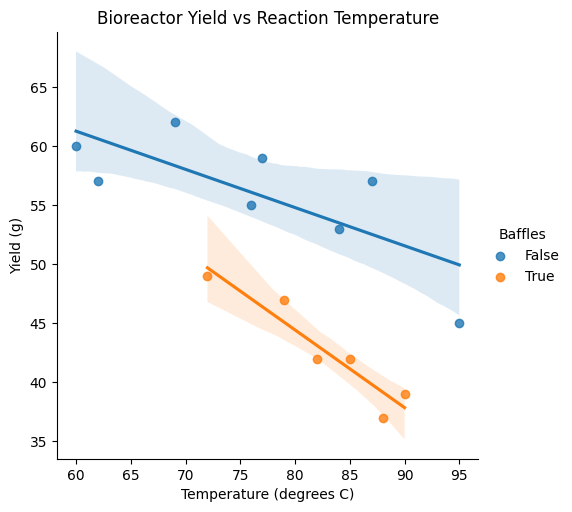

In [27]:
sns.lmplot(x='Temp_C', y='Yield_g', data=reactor_data, hue='Baffles')
plt.title('Bioreactor Yield vs Reaction Temperature')
plt.xlabel('Temperature (degrees C)')
plt.ylabel('Yield (g)')
plt.show()

In [6]:
modelB = ols('Yield_g~Temp_C+Baffles+Speed_100RPM', data=reactor_data)
modelB_fit = modelB.fit()
print(modelB_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                Yield_g   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     22.72
Date:                Sat, 16 Nov 2024   Prob (F-statistic):           8.76e-05
Time:                        21:28:21   Log-Likelihood:                -34.683
No. Observations:                  14   AIC:                             77.37
Df Residuals:                      10   BIC:                             79.92
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          85.8836     11.309     

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [7]:
temp = 50
baffles = 0
speed = 3500/100
yield_pred = modelB_fit.predict({'Temp_C': temp, 'Baffles': baffles, 'Speed_100RPM': speed})
print(yield_pred)

0    66.102717
dtype: float64


## Problem 2

In [8]:
# Data points
X1 = np.array([14, 17, 14, 17, 15, 15, 15, 15, 15])
X2 = np.array([28, 28, 31, 31, 29, 29, 29, 29, 29])
Y = np.array([32.8837, 46.1228, 58.4677, 72.333, 46.1872, 47.529, 36.7764, 37.4251, 47.742])
p2_df = pd.DataFrame({'X1': X1, 'X2': X2, 'Y': Y})
p2_df

,X1,X2,Y
0,14,28,32.8837
1,17,28,46.1228
2,14,31,58.4677
3,17,31,72.3330
4,15,29,46.1872
5,15,29,47.5290
6,15,29,36.7764
7,15,29,37.4251
8,15,29,47.7420


In [9]:
X1sum = np.sum(X1)
X2sum = np.sum(X2)
ysum = np.sum(Y)

X1avg = np.mean(X1)
X2avg = np.mean(X2)
yavg = np.mean(Y)

print(X1sum, X2sum, X1avg, X2avg, ysum, yavg)

X1prime = X1 - X1avg
X2prime = X2 - X2avg
Yprime = Y - yavg

print(X1prime)
print(X2prime)
print(Yprime)

137 263 15.222222222222221 29.22222222222222 425.46690000000007 47.274100000000004
[-1.22222222  1.77777778 -1.22222222  1.77777778 -0.22222222 -0.22222222
 -0.22222222 -0.22222222 -0.22222222]
[-1.22222222 -1.22222222  1.77777778  1.77777778 -0.22222222 -0.22222222
 -0.22222222 -0.22222222 -0.22222222]
[-14.3904  -1.1513  11.1936  25.0589  -1.0869   0.2549 -10.4977  -9.849
   0.4679]


In [10]:
model2_test = ols('Y~X1+X2', data=p2_df)
model2_test = model2_test.fit()
print(model2_test.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     22.46
Date:                Sat, 16 Nov 2024   Prob (F-statistic):            0.00164
Time:                        21:28:21   Log-Likelihood:                -25.052
No. Observations:                   9   AIC:                             56.10
Df Residuals:                       6   BIC:                             56.70
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -287.1542     49.976     -5.746      0.0

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [11]:
# Construct matrix X with a column of ones for the intercept
X_matrix = np.vstack((np.ones(len(X1)), X1prime, X2prime)).T
X_matrix

print(np.linalg.inv(X_matrix.T @ X_matrix) @ X_matrix.T @ Y)

# Perform the linear regression to find coefficients
coefficients = np.linalg.inv(X_matrix.T @ X_matrix) @ X_matrix.T @ Y

# Extract the coefficients
b0, b1, b2 = coefficients

print(f"Intercept (b0): {b0:.4f}")
print(f"Coefficient for X1 (b1): {b1:.4f}")
print(f"Coefficient for X2 (b2): {b2:.4f}")

[47.2741      4.81904579  8.93401245]
Intercept (b0): 47.2741
Coefficient for X1 (b1): 4.8190
Coefficient for X2 (b2): 8.9340


In [12]:
model1 = ols('Y~X1', data=p2_df)
model1_fit = model1.fit()
print(model1_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.233
Model:                            OLS   Adj. R-squared:                  0.123
Method:                 Least Squares   F-statistic:                     2.123
Date:                Sat, 16 Nov 2024   Prob (F-statistic):              0.188
Time:                        21:28:21   Log-Likelihood:                -33.484
No. Observations:                   9   AIC:                             70.97
Df Residuals:                       7   BIC:                             71.36
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -33.9892     55.903     -0.608      0.5

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [13]:
# ANOVA table
anova_table = anova_lm(model1_fit)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
X1,1.0,272.325783,272.325783,2.122811,0.188468
Residual,7.0,897.998234,128.285462,NaN,NaN


In [14]:
# compute adjusted coefficient of determination
ss_error = np.sum(model1_fit.resid**2)
ss_total = np.sum((Y - yavg)**2)
r2 = 1 - ss_error/ss_total

print(ss_error, ss_total)
print(f"R-squared: {r2:.4f}")

897.9982338283721 1170.3240163399998
R-squared: 0.2327


In [15]:
f_stat = model1_fit.fvalue
f_pval = model1_fit.f_pvalue

print(f"F-statistic: {f_stat}")
print(f"P-value: {f_pval}")

t_stat = model1_fit.tvalues[1]
t_pval = model1_fit.pvalues[1]

print(f"t-statistic: {t_stat}")
print(f"P-value: {t_pval}")

F-statistic: 2.1228109430176545
P-value: 0.1884676037200037
t-statistic: 1.4569869398926176
P-value: 0.18846760372000368


In [16]:
model2 = ols('Y~X1+X2', data=p2_df)
model2 = model2.fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     22.46
Date:                Sat, 16 Nov 2024   Prob (F-statistic):            0.00164
Time:                        21:28:21   Log-Likelihood:                -25.052
No. Observations:                   9   AIC:                             56.10
Df Residuals:                       6   BIC:                             56.70
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -287.1542     49.976     -5.746      0.0

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [17]:
anova_table = anova_lm(model2)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
X1,1.0,272.325783,272.325783,11.850166,0.013760
X2,1.0,760.113696,760.113696,33.076096,0.001203
Residual,6.0,137.884538,22.980756,NaN,NaN


In [18]:
# compute r2 and adjusted r2

ss_error = np.sum(model2.resid**2)
ss_total = np.sum((Y - yavg)**2)
r2 = 1 - ss_error/ss_total
r2_adj = 1 - (ss_error/(len(Y) - 3))/(ss_total/(len(Y) - 1))

print(f"R-squared: {r2:.4f}")
print(f"Adjusted R-squared: {r2_adj:.4f}")

r2 = model2.rsquared
r2_adj = model2.rsquared_adj

print(f"R-squared: {r2:.4f}")
print(f"Adjusted R-squared: {r2_adj:.4f}")

R-squared: 0.8822
Adjusted R-squared: 0.8429
R-squared: 0.8822
Adjusted R-squared: 0.8429


## Problem 3

In [19]:
probe_df = pd.read_csv('probecurrent.csv')
probe_df

,ProbeSize,ProbeCurrent
0,0.00,0.00
1,1.12,406.63
2,1.43,376.25
3,2.24,598.22
4,2.36,596.61
5,3.78,725.97
6,3.87,712.25
7,4.44,707.70
8,5.39,721.70
9,5.49,759.08


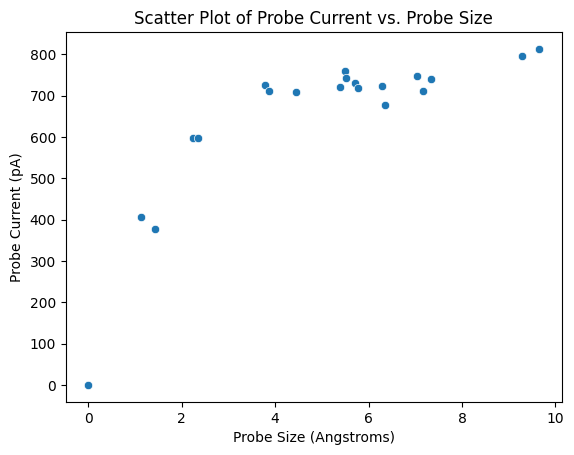

In [20]:
sns.scatterplot(x='ProbeSize', y='ProbeCurrent', data=probe_df)
plt.title('Scatter Plot of Probe Current vs. Probe Size')
plt.xlabel('Probe Size (Angstroms)')
plt.ylabel('Probe Current (pA)')
plt.show()

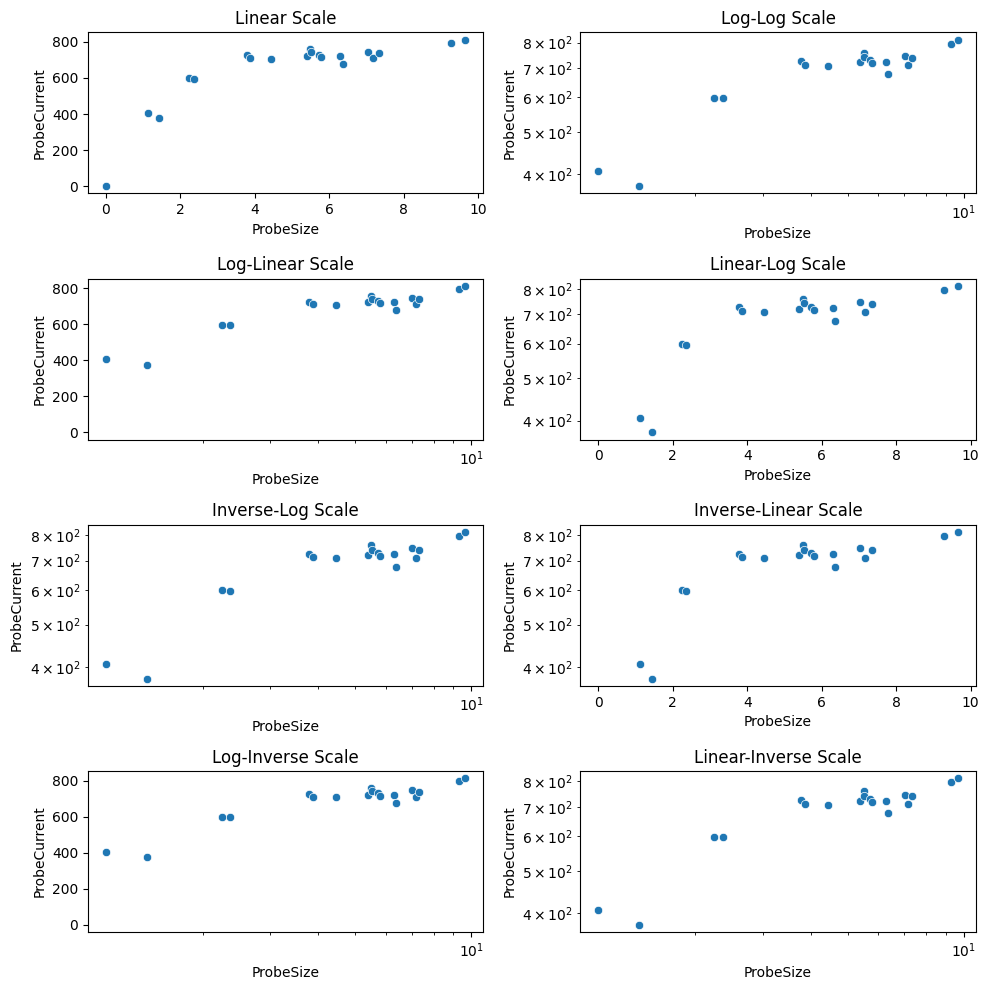

In [21]:
fig, axs = plt.subplots(4, 2, figsize=(10, 10))

# linear plot
sns.scatterplot(x='ProbeSize', y='ProbeCurrent', data=probe_df, ax=axs[0, 0])
axs[0, 0].set_title('Linear Scale')

# log-log plot
sns.scatterplot(x='ProbeSize', y='ProbeCurrent', data=probe_df, ax=axs[0, 1])
axs[0, 1].set_title('Log-Log Scale')
axs[0, 1].set_xscale('log')
axs[0, 1].set_yscale('log')

# log-linear plot
sns.scatterplot(x='ProbeSize', y='ProbeCurrent', data=probe_df, ax=axs[1, 0])
axs[1, 0].set_title('Log-Linear Scale')
axs[1, 0].set_xscale('log')

# linear-log plot
sns.scatterplot(x='ProbeSize', y='ProbeCurrent', data=probe_df, ax=axs[1, 1])
axs[1, 1].set_title('Linear-Log Scale')
axs[1, 1].set_yscale('log')

# inverse-log plot
sns.scatterplot(x='ProbeSize', y='ProbeCurrent', data=probe_df, ax=axs[2, 0])
axs[2, 0].set_title('Inverse-Log Scale')
axs[2, 0].set_xscale('log', base=10)
axs[2, 0].set_yscale('log', base=10)

# inverse-linear plot
sns.scatterplot(x='ProbeSize', y='ProbeCurrent', data=probe_df, ax=axs[2, 1])
axs[2, 1].set_title('Inverse-Linear Scale')
axs[2, 1].set_yscale('log', base=10)

# log-inverse plot
sns.scatterplot(x='ProbeSize', y='ProbeCurrent', data=probe_df, ax=axs[3, 0])
axs[3, 0].set_title('Log-Inverse Scale')
axs[3, 0].set_xscale('log', base=10)

# linear-inverse plot
sns.scatterplot(x='ProbeSize', y='ProbeCurrent', data=probe_df, ax=axs[3, 1])
axs[3, 1].set_title('Linear-Inverse Scale')
axs[3, 1].set_xscale('log', base=10)
axs[3, 1].set_yscale('log', base=10)

plt.tight_layout()
plt.show()

In [22]:
model_probe = ols('ProbeCurrent~ProbeSize+I(ProbeSize*ProbeSize)', data=probe_df)
model_probe_fit = model_probe.fit()
print(model_probe_fit.summary())

                            OLS Regression Results                            
Dep. Variable:           ProbeCurrent   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     49.60
Date:                Sat, 16 Nov 2024   Prob (F-statistic):           8.02e-08
Time:                        21:28:23   Log-Likelihood:                -113.59
No. Observations:                  20   AIC:                             233.2
Df Residuals:                      17   BIC:                             236.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

In [23]:
model_probe_o3 = ols('ProbeCurrent~ProbeSize+I(ProbeSize*ProbeSize)+I(ProbeSize*ProbeSize*ProbeSize)', data=probe_df)
model_probe_o3_fit = model_probe_o3.fit()
print(model_probe_o3_fit.summary())

                            OLS Regression Results                            
Dep. Variable:           ProbeCurrent   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.980
Method:                 Least Squares   F-statistic:                     308.7
Date:                Sat, 16 Nov 2024   Prob (F-statistic):           2.29e-14
Time:                        21:28:23   Log-Likelihood:                -92.058
No. Observations:                  20   AIC:                             192.1
Df Residuals:                      16   BIC:                             196.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


In [24]:
model_probe_o4 = ols('ProbeCurrent~ProbeSize+I(ProbeSize*ProbeSize)+I(ProbeSize*ProbeSize*ProbeSize)+I(ProbeSize*ProbeSize*ProbeSize*ProbeSize)', data=probe_df)
model_probe_o4_fit = model_probe_o4.fit()
print(model_probe_o4_fit.summary())

                            OLS Regression Results                            
Dep. Variable:           ProbeCurrent   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.980
Method:                 Least Squares   F-statistic:                     232.2
Date:                Sat, 16 Nov 2024   Prob (F-statistic):           2.70e-13
Time:                        21:28:23   Log-Likelihood:                -91.393
No. Observations:                  20   AIC:                             192.8
Df Residuals:                      15   BIC:                             197.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                                       coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------

In [25]:
model_probe_o5 = ols('ProbeCurrent~ProbeSize+I(ProbeSize*ProbeSize)+I(ProbeSize*ProbeSize*ProbeSize)+I(ProbeSize*ProbeSize*ProbeSize*ProbeSize)+I(ProbeSize*ProbeSize*ProbeSize*ProbeSize*ProbeSize)', data=probe_df)
model_probe_o5_fit = model_probe_o5.fit()
print(model_probe_o5_fit.summary())

                            OLS Regression Results                            
Dep. Variable:           ProbeCurrent   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                     178.1
Date:                Sat, 16 Nov 2024   Prob (F-statistic):           3.71e-12
Time:                        21:28:23   Log-Likelihood:                -91.129
No. Observations:                  20   AIC:                             194.3
Df Residuals:                      14   BIC:                             200.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                                                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------

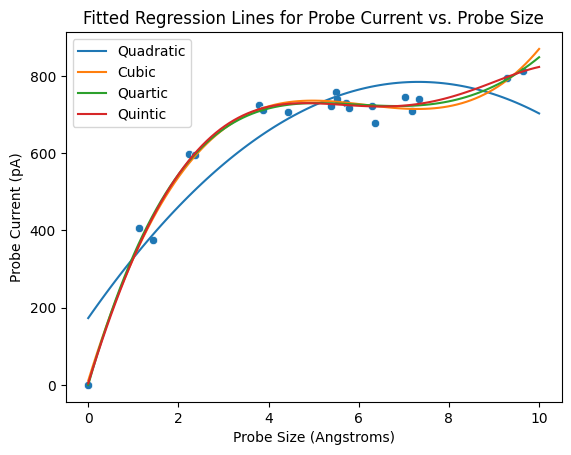

In [26]:
sns.scatterplot(x='ProbeSize', y='ProbeCurrent', data=probe_df)
x_values = np.linspace(0, 10, 100)

y_values = model_probe_fit.params['Intercept'] + model_probe_fit.params['ProbeSize']*x_values + model_probe_fit.params['I(ProbeSize * ProbeSize)']*x_values**2
plt.plot(x_values, y_values, label='Quadratic')

y_values = model_probe_o3_fit.params['Intercept'] + model_probe_o3_fit.params['ProbeSize']*x_values + model_probe_o3_fit.params['I(ProbeSize * ProbeSize)']*x_values**2 + model_probe_o3_fit.params['I(ProbeSize * ProbeSize * ProbeSize)']*x_values**3
plt.plot(x_values, y_values, label='Cubic')

y_values = model_probe_o4_fit.params['Intercept'] + model_probe_o4_fit.params['ProbeSize']*x_values + model_probe_o4_fit.params['I(ProbeSize * ProbeSize)']*x_values**2 + model_probe_o4_fit.params['I(ProbeSize * ProbeSize * ProbeSize)']*x_values**3 + model_probe_o4_fit.params['I(ProbeSize * ProbeSize * ProbeSize * ProbeSize)']*x_values**4
plt.plot(x_values, y_values, label='Quartic')

y_values = model_probe_o5_fit.params['Intercept'] + model_probe_o5_fit.params['ProbeSize']*x_values + model_probe_o5_fit.params['I(ProbeSize * ProbeSize)']*x_values**2 + model_probe_o5_fit.params['I(ProbeSize * ProbeSize * ProbeSize)']*x_values**3 + model_probe_o5_fit.params['I(ProbeSize * ProbeSize * ProbeSize * ProbeSize)']*x_values**4 + model_probe_o5_fit.params['I(ProbeSize * ProbeSize * ProbeSize * ProbeSize * ProbeSize)']*x_values**5
plt.plot(x_values, y_values, label='Quintic')

plt.title('Fitted Regression Lines for Probe Current vs. Probe Size')
plt.xlabel('Probe Size (Angstroms)')
plt.ylabel('Probe Current (pA)')
plt.legend()
plt.show()                                                                                                                                                 